I'll train a real small stupid model, then try to apply k-means quantization to the weights

In [1]:
import torch
import matplotlib.pyplot as plt

torch.Size([1000, 1]) torch.Size([1000, 1])


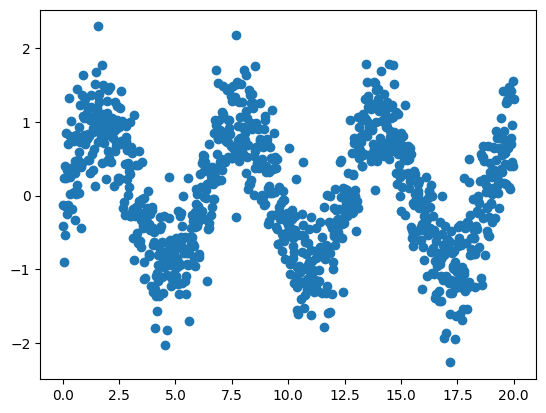

In [11]:
n = 1_000
X = torch.linspace(0, 20, n).reshape(-1, 1)
Y = torch.sin(X) + torch.randn(n, 1) * 0.4 + torch.randn(n, 1) * 0.1
print(Y.shape, X.shape)
plt.scatter(X, Y)

In [51]:
model = torch.nn.Sequential(
    torch.nn.Linear(1, 20),
    torch.nn.Tanh(),
    torch.nn.Linear(20, 1),
)

lr = 1e-3
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)

In [53]:
epochs = 10_000
for i in range(epochs):
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(i, loss.detach().item())

0 0.29696667194366455
1 0.2969565987586975
2 0.29694652557373047
3 0.29693639278411865
4 0.2969263195991516
5 0.2969162166118622
6 0.29690611362457275
7 0.2968961000442505
8 0.29688605666160583
9 0.2968759834766388
10 0.29686591029167175
11 0.2968558669090271
12 0.29684582352638245
13 0.2968357503414154
14 0.29682567715644836
15 0.2968156933784485
16 0.29680562019348145
17 0.29679563641548157
18 0.2967855930328369
19 0.29677554965019226
20 0.2967655658721924
21 0.29675552248954773
22 0.2967454791069031
23 0.2967355251312256
24 0.29672548174858093
25 0.29671549797058105
26 0.2967055141925812
27 0.2966955006122589
28 0.29668551683425903
29 0.29667553305625916
30 0.2966655492782593
31 0.2966555655002594
32 0.2966456115245819
33 0.29663562774658203
34 0.29662564396858215
35 0.29661568999290466
36 0.2966057062149048
37 0.2965957522392273
38 0.2965857982635498
39 0.2965758740901947
40 0.2965659201145172
41 0.2965559661388397
42 0.29654601216316223
43 0.29653605818748474
44 0.2965261340141296

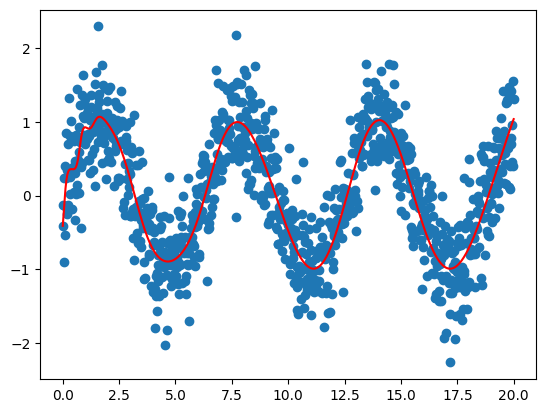

In [54]:
plt.scatter(X, Y)
plt.plot(X, model(X).detach(), 'r')

In [55]:
# save model in pth
torch.save(model.state_dict(), 'tanh-20.pth')